<a href="https://colab.research.google.com/github/TUIlmenauAMS/Audio-Processing-Resources/blob/main/audioProcessingResources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Python Programs and Book for Building an Audio Coder and for Deep Learning for Audio
## <center> Gerald Schuller
## <center> Ilmenau University of Technology
## <center> Ilmenau, Germany

## Book on "Filter Banks and Audio Coding"
* During the pandemic I finished my book on **"Filter Banks and Audio coding - Compressing Audio Signals Using Python"** (Springer)
https://www.amazon.com/Filter-Banks-Audio-Coding-Compressing/dp/3030512487?asin=3030512487&revisionId=&format=4&depth=1
* Filter banks: an essential tool for audio processing
* Audio coding: 
 * transmitting and storing audio signals, 
 * as part of high quality teleconferencing, like with "Facetime" or similar,
 * for listening to music electronically in almost every way.

## Python Colab Examples for our Audio Coding Lecture and the Book
* This contains the Python examples for our lecture and the book in Colab notebooks, and videos explaining them,
* https://github.com/TUIlmenauAMS/AudioCoding_Tutorials

## The Python Audio Coder for the Lecture and the Book
* This repository contains all the Python functions for the lecture and the book,
* https://github.com/TUIlmenauAMS/Python-Audio-Coder

In [ ]:
#Clone the Python audio coder Github:
!git clone https://github.com/TUIlmenauAMS/Python-Audio-Coder

Cloning into 'Python-Audio-Coder'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 126 (delta 19), reused 0 (delta 0), pack-reused 91
Receiving objects: 100% (126/126), 2.24 MiB | 10.50 MiB/s, done.
Resolving deltas: 100% (53/53), done.


### The repository contains a complete audio coder in Python:

In [ ]:
!ls
#Go into the directory and list the wav files there:
%cd Python-Audio-Coder
print("The current working directory:")
!pwd
print("List the content of the current directory:")
!ls
print("List all .wav files:")
!ls -lh *.wav

audio_decoder.py		      MDCTfb.py
audio_encoder.py		      MultiDimLifting.jpg
DCT4.py				      optimfuncLDFB.py
DCTo.py				      optimfuncMDCT.py
Dinvmatrix.py			      optimfuncQMF.py
Dmatrix.py			      optimization_exampleLDFB.py
Fa2h.py				      optimization_example.py
fantasy-orchestra.wav		      polmatmult.py
Ginvmatrix.py			      polyphase2x.py
Gmatrix.py			      PQMFB.py
ha2Pa3d.py			      PQMF_Skript.py
hs2Ps3d.py			      psyacpostfilterFromFile.py
IntMDCTfb.py			      psyacprefilterToFile.py
LDFB.py				      psyacprepostfilter.py
LiftingFmat.py			      PythonPsychoacoustics
lmslosslessexample.py		      README.md
lmsquantexample.py		      ricecodertest.py
lossless_arithmetic_audio_encoder.py  sound.py
lossless_predictive_audio_decoder.py  symFmatrix.py
lossless_predictive_audio_encoder.py  test48khz.wav
lossless_rice_audio_decoder.py	      wclms_losslessexample.py
lossless_rice_audio_encoder.py	      x2polyphase.py
lpcexample.py
[Errno 2] No such file or directory: 'Python-Audio

In [ ]:
#Listen to one of the wav files:
from IPython.display import Audio
Audio("test48khz.wav")

In [ ]:
#Install the Huffman coder module and run the encoder:
!pip install dahuffman
!python audio_encoder.py test48khz.wav
print("The encoded file is *.acod, list its size:")
!ls -lh *.acod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
audiofile= test48khz.wav
channels= 1
Compressed file: test48khz.acod
channel  0
quality= 100.0
Computing MDCT for sound file,
masking threshold calculation,
quantization according to the masking threshold,
Huffman Coding
Total number of bytes= 42328
Total number of samples: 192000
bytes per sample= 0.22045833333333334
Hence bis per sample= 1.7636666666666667
The encoded file is *.acod, list its size:
-rw-r--r-- 1 root root 44K Sep 20 15:37 test48khz.acod


### The Decoder

In [ ]:
#The decoder:
!python audio_decoder.py test48khz.acod
print("List the size of the decoded file (should be about the same as the original):")
!ls -lh *rek.wav

encoded file= test48khz.acod
Decoded file: test48khzrek.wav
fs= 48000 channels= 1
channel  0
Inverse MDCT
List the size of the decoded file (should be about the same as the original):
-rw-r--r-- 1 root root 379K Sep 20 15:42 test48khzrek.wav


In [ ]:
#Listen to the decoded wav file. Ideally it should sound the same as the original:
from IPython.display import Audio
Audio("test48khzrek.wav")

### Filter Bank Optimization
* The repository also contains tools and examples for optimizing filter banks.

#### An MDCT Type Filter Bank 

In [ ]:
#Optimize an MDCT type filter bank with command line Python:
!python optimfuncMDCT.py

starting error= 2191646569.0241604
         Current function value: 862253523.261647
         Iterations: 36
         Function evaluations: 663
         Gradient evaluations: 93
optimized coefficients= [-0.25026685 -0.56062332 -0.82807059 -0.96817688 -0.9681765  -0.82807263]
error after optim.= 862253523.261647
h= [0.25026847 0.56062136 0.82807263 0.9681765  0.96817688 0.82807059
 0.56062332 0.25026685]
Figure(640x480)
Figure(640x480)


starting error= 2215829394.5938582
         Current function value: 862253523.733267
         Iterations: 39
         Function evaluations: 744
         Gradient evaluations: 105
optimized coefficients= [-0.25026598 -0.56061903 -0.82807111 -0.96817699 -0.96817636 -0.8280721 ]
error after optim.= 862253523.7332666
h= [0.25026943 0.56062567 0.8280721  0.96817636 0.96817699 0.82807111
 0.56061903 0.25026598]


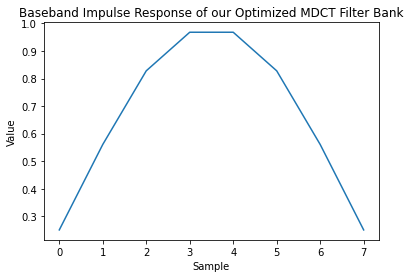

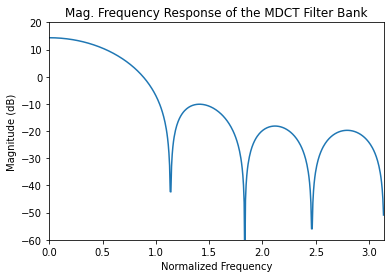

In [ ]:
#For plot outputs in Colab, import loss function:
from optimfuncMDCT import *

#then copy the "main" part here:
if __name__ == '__main__':  #run the optimization
  import numpy as np
  import scipy as sp
  import scipy.optimize
  import scipy.signal
  import matplotlib.pyplot as plt
  from symFmatrix import symFmatrix
  from polmatmult import polmatmult 
  from Dmatrix import Dmatrix
  from Fa2h import Fa2h

  N=4
  #Start optimization with some starting point:
  x0 = -np.random.rand(int(1.5*N))
  print("starting error=", optimfuncMDCT(x0, N)) #test optim. function
  xmin = sp.optimize.minimize(optimfuncMDCT, x0, args=(N,), options={'disp':True})
  print("optimized coefficients=", xmin.x)
  np.savetxt("MDCTcoeff.txt", xmin.x)
  print("error after optim.=", optimfuncMDCT(xmin.x, N))
  #Baseband Impulse Response:
  Fa = symFmatrix(xmin.x) 
  Faz = polmatmult(Fa, Dmatrix(N))
  h = Fa2h(Faz)
  print("h=", h)
  plt.plot(h)
  plt.xlabel('Sample')
  plt.ylabel('Value')
  plt.title('Baseband Impulse Response of our Optimized MDCT Filter Bank')
  plt.figure()
  #Magnitude Response:
  w,H=sp.signal.freqz(h) 
  plt.plot(w,20*np.log10(abs(H)))
  plt.axis([0, 3.14, -60,20])
  plt.xlabel('Normalized Frequency')
  plt.ylabel('Magnitude (dB)')
  plt.title('Mag. Frequency Response of the MDCT Filter Bank') 
  plt.show()

#### A Low Delay Filter Bank Optimization

differential_evolution step 1: f(x)= 8.16157e+06
differential_evolution step 2: f(x)= 7.70618e+06
differential_evolution step 3: f(x)= 6.166e+06
differential_evolution step 4: f(x)= 6.166e+06
differential_evolution step 5: f(x)= 3.90305e+06
differential_evolution step 6: f(x)= 3.71088e+06
differential_evolution step 7: f(x)= 3.71088e+06
differential_evolution step 8: f(x)= 3.71088e+06
differential_evolution step 9: f(x)= 3.49082e+06
differential_evolution step 10: f(x)= 3.49082e+06
differential_evolution step 11: f(x)= 2.73363e+06
differential_evolution step 12: f(x)= 2.71233e+06
differential_evolution step 13: f(x)= 2.00821e+06
differential_evolution step 14: f(x)= 2.00821e+06
differential_evolution step 15: f(x)= 2.00821e+06
differential_evolution step 16: f(x)= 2.00821e+06
differential_evolution step 17: f(x)= 2.00821e+06
differential_evolution step 18: f(x)= 1.91463e+06
differential_evolution step 19: f(x)= 1.49313e+06
differential_evolution step 20: f(x)= 1.49313e+06
differential_

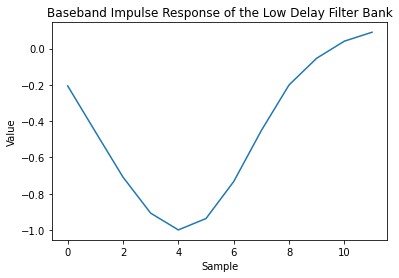

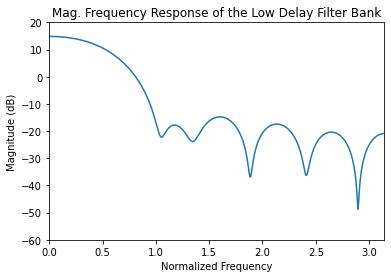

In [ ]:
from optimfuncLDFB import *

if __name__ == '__main__':  #run the optimization
  import scipy as sp
  import scipy.signal
  import matplotlib.pyplot as plt

  N=4  #number of subbands
  s=2*N
  bounds=[(-14,14)]*s
  xmin = sp.optimize.differential_evolution(optimfuncLDFB, bounds, args=(N,), disp=True)
  print("error after optim.=",xmin.fun)
  print("optimized coefficients=",xmin.x)
  np.savetxt("LDFBcoeff.txt", xmin.x)
  x=xmin.x;
  #Baseband Impulse Response:
  Fa = symFmatrix(x[0:int(1.5*N)])
  #print("Fa=", Fa[:,:,0])
  Faz = polmatmult(Fa,Dmatrix(N))
  Faz = polmatmult(Faz,Gmatrix(x[int(1.5*N):(2*N)]))
  h = Fa2h(Faz)
  plt.plot(h)
  plt.xlabel('Sample')
  plt.ylabel('Value')
  plt.title('Baseband Impulse Response of the Low Delay Filter Bank')
  #Magnitude Response:
  w,H=sp.signal.freqz(h) 
  plt.figure()
  plt.plot(w,20*np.log10(abs(H)))
  plt.axis([0, 3.14, -60,20])
  plt.xlabel('Normalized Frequency')
  plt.ylabel('Magnitude (dB)')
  plt.title('Mag. Frequency Response of the Low Delay Filter Bank')
  plt.show()

* Observe that low delay filters are **non-symmetric**
* This low delay filter bank has the **same algorithmic delay** as the MDCT but longer filters and hence **better stopband attenuation**.
* Also observe that the **non-convex optimization** method "differential_evolution" was necessary to achieve good optimization results.

#### A Pseudo Quadrature Mirror Filter Bank Optimiztion (PQMF)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  # Remove the CWD from sys.path while we load stuff.


starting error= 17268.454570708196
error after optim.= 0.024861648828539983
optimized coefficients= [ 7.91240284e-04  4.47747010e-03  1.41349062e-02  3.15101976e-02
  5.33825302e-02  6.93197410e-02  6.45130183e-02  2.91662569e-02
 -2.92442296e-02 -7.92344007e-02 -7.23899557e-02  3.44538613e-02
  2.51353924e-01  5.38212439e-01  8.12140426e-01  9.79814749e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.savetxt is deprecated and will be removed in SciPy 2.0.0, use numpy.savetxt instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.flipud is deprecated and will be removed in SciPy 2.0.0, use numpy.flipud instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead


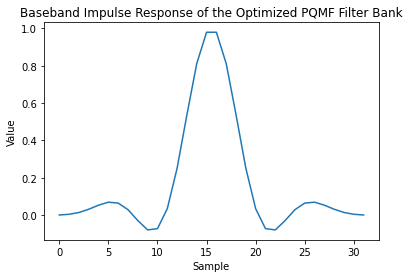

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


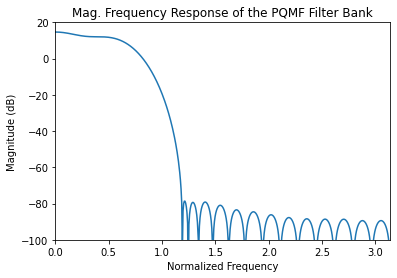

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.square is deprecated and will be removed in SciPy 2.0.0, use numpy.square instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: scipy.square is deprecated and will be removed in SciPy 2.0.0, use numpy.square instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: scipy.flipud is deprecated and will be removed in SciPy 2.0.0, use numpy.flipud instead


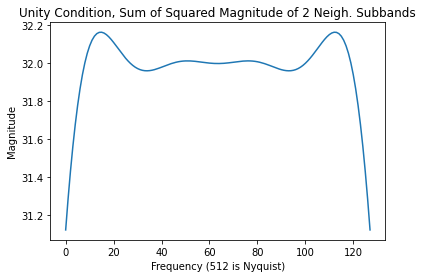

In [ ]:
from optimfuncQMF import *

if __name__ == '__main__':  #run the optimization
   from scipy.optimize import minimize
   import scipy as sp
   import matplotlib.pyplot as plt

   N=4 #Number of subbands
   #Start optimization with "good" starting point:
   x0 = 16*sp.ones(4*N)
   print("starting error=", optimfuncQMF(x0,N)) #test optim. function
   xmin = minimize(optimfuncQMF,x0, args=(N,), method='SLSQP')
   print("error after optim.=",xmin.fun)
   print("optimized coefficients=",xmin.x)
   #Store the found coefficients in a text file: 
   sp.savetxt("QMFcoeff.txt", xmin.x)
   #we compute the resulting baseband prototype function:
   h = sp.concatenate((xmin.x,sp.flipud(xmin.x)))
   plt.plot(h)
   plt.xlabel('Sample')
   plt.ylabel('Value')
   plt.title('Baseband Impulse Response of the Optimized PQMF Filter Bank')
   #plt.xlim((0,31))
   plt.show()
   #The corresponding frequency response:
   w,H=sp.signal.freqz(h) 
   plt.plot(w,20*sp.log10(abs(H)))
   plt.axis([0, 3.14, -100,20])
   plt.xlabel('Normalized Frequency')
   plt.ylabel('Magnitude (dB)')
   plt.title('Mag. Frequency Response of the PQMF Filter Bank')
   plt.show()
   #Checking the "unity condition":
   posfreq = sp.square(abs(H[0:int(512/N)]));
   negfreq = sp.flipud(sp.square(abs(H[0:int(512/N)])))
   plt.plot(posfreq+negfreq)
   plt.xlabel('Frequency (512 is Nyquist)')
   plt.ylabel('Magnitude')
   plt.title('Unity Condition, Sum of Squared Magnitude of 2 Neigh. Subbands')
   plt.show() 

## My Tutorial on Deep Learning for Audio
* https://github.com/TUIlmenauAMS/AES_Tutorial_2021

### Useful data conversion tools
* It contains some useful tools, like converting an audio signal Numpy array for Pytorch,
* or generatingartificial audio training or test signals for data augemtation,
* https://colab.research.google.com/github/TUIlmenauAMS/AES_Tutorial_2021/blob/main/AEStutorialDeepLearingfor_Audio.ipynb#scrollTo=zFcc_gIkKrnk

### A convolutional layer as trained predictive filter
* Another example is a trained predictive audio filter implented using a convolutional layer in Pytorch,
* https://colab.research.google.com/github/TUIlmenauAMS/AES_Tutorial_2021/blob/main/AEStutorialDeepLearingfor_Audio.ipynb#scrollTo=Kcwx878ft9ps

### An audio recognizer or classifier example
* A somewhat more sophisticated example is an audio recognizer or classifier,
* https://colab.research.google.com/github/TUIlmenauAMS/AES_Tutorial_2021/blob/main/AEStutorialDeepLearingfor_Audio.ipynb#scrollTo=2k548_lzOiFm

### An Audio Variational Autoencoder (VAE) example
* An interesting and sometime fun tool for **audio generation** is the Variational Autoencoder.
* https://colab.research.google.com/github/TUIlmenauAMS/AES_Tutorial_2021/blob/main/AEStutorialDeepLearingfor_Audio.ipynb#scrollTo=eA0aWltoipgB


### Recurrent Neural Networks (RNN)
* Recurrent neural networks are interesting for audio because they can be seen as an extension of IIR filters
* These are good in modelling damped sinusoids, or damped oscillators
* hence for generating tonal attack sounds
* https://colab.research.google.com/github/TUIlmenauAMS/AES_Tutorial_2021/blob/main/AEStutorialDeepLearingfor_Audio.ipynb#scrollTo=r5my7PgkdjXL

## Ultra Low Delay Audio Source Separation with Probabilistic Optimization
* https://colab.research.google.com/github/TUIlmenauAMS/LowDelayMultichannelSourceSeparation_Random-Directions_Demo/blob/main/online_multichannel_source_separation_random_directions_demo.ipynb

## Conclusions
* For teaching and learning, and for experiments I presented 
 * resources for audio coding, the book, its Github repository, tutorial videos and Jupyter notebooks
 * a Jupyter notebook with code examples for deep learning for audio processing. 
 * a demo for probabilistic optimization as applied to ultra low delay audio source separation